# Parametric model of plate with multiple holes

### Objective:
In this example we'll setup a parametric model in PyMAPDL for a rectangular plate with multiple holes. The model is setup such that one can change the dimensions of the plate, the number of holes and their radius, the material properties and the pressure applied.

The learning objectives of this demo are:
* Launch PyMAPDL on a local machine
* Setup and solve a parametric model using PyMAPDL
* Interactive plotting of CAD, mesh, and results in Pythonic interface.

#### Model parameters:
* Length, width and depth of the plate
* Number of holes
* Raidus of the holes
* Material properties (Young's modulus and Poisson's ratio)
* Applied pressure
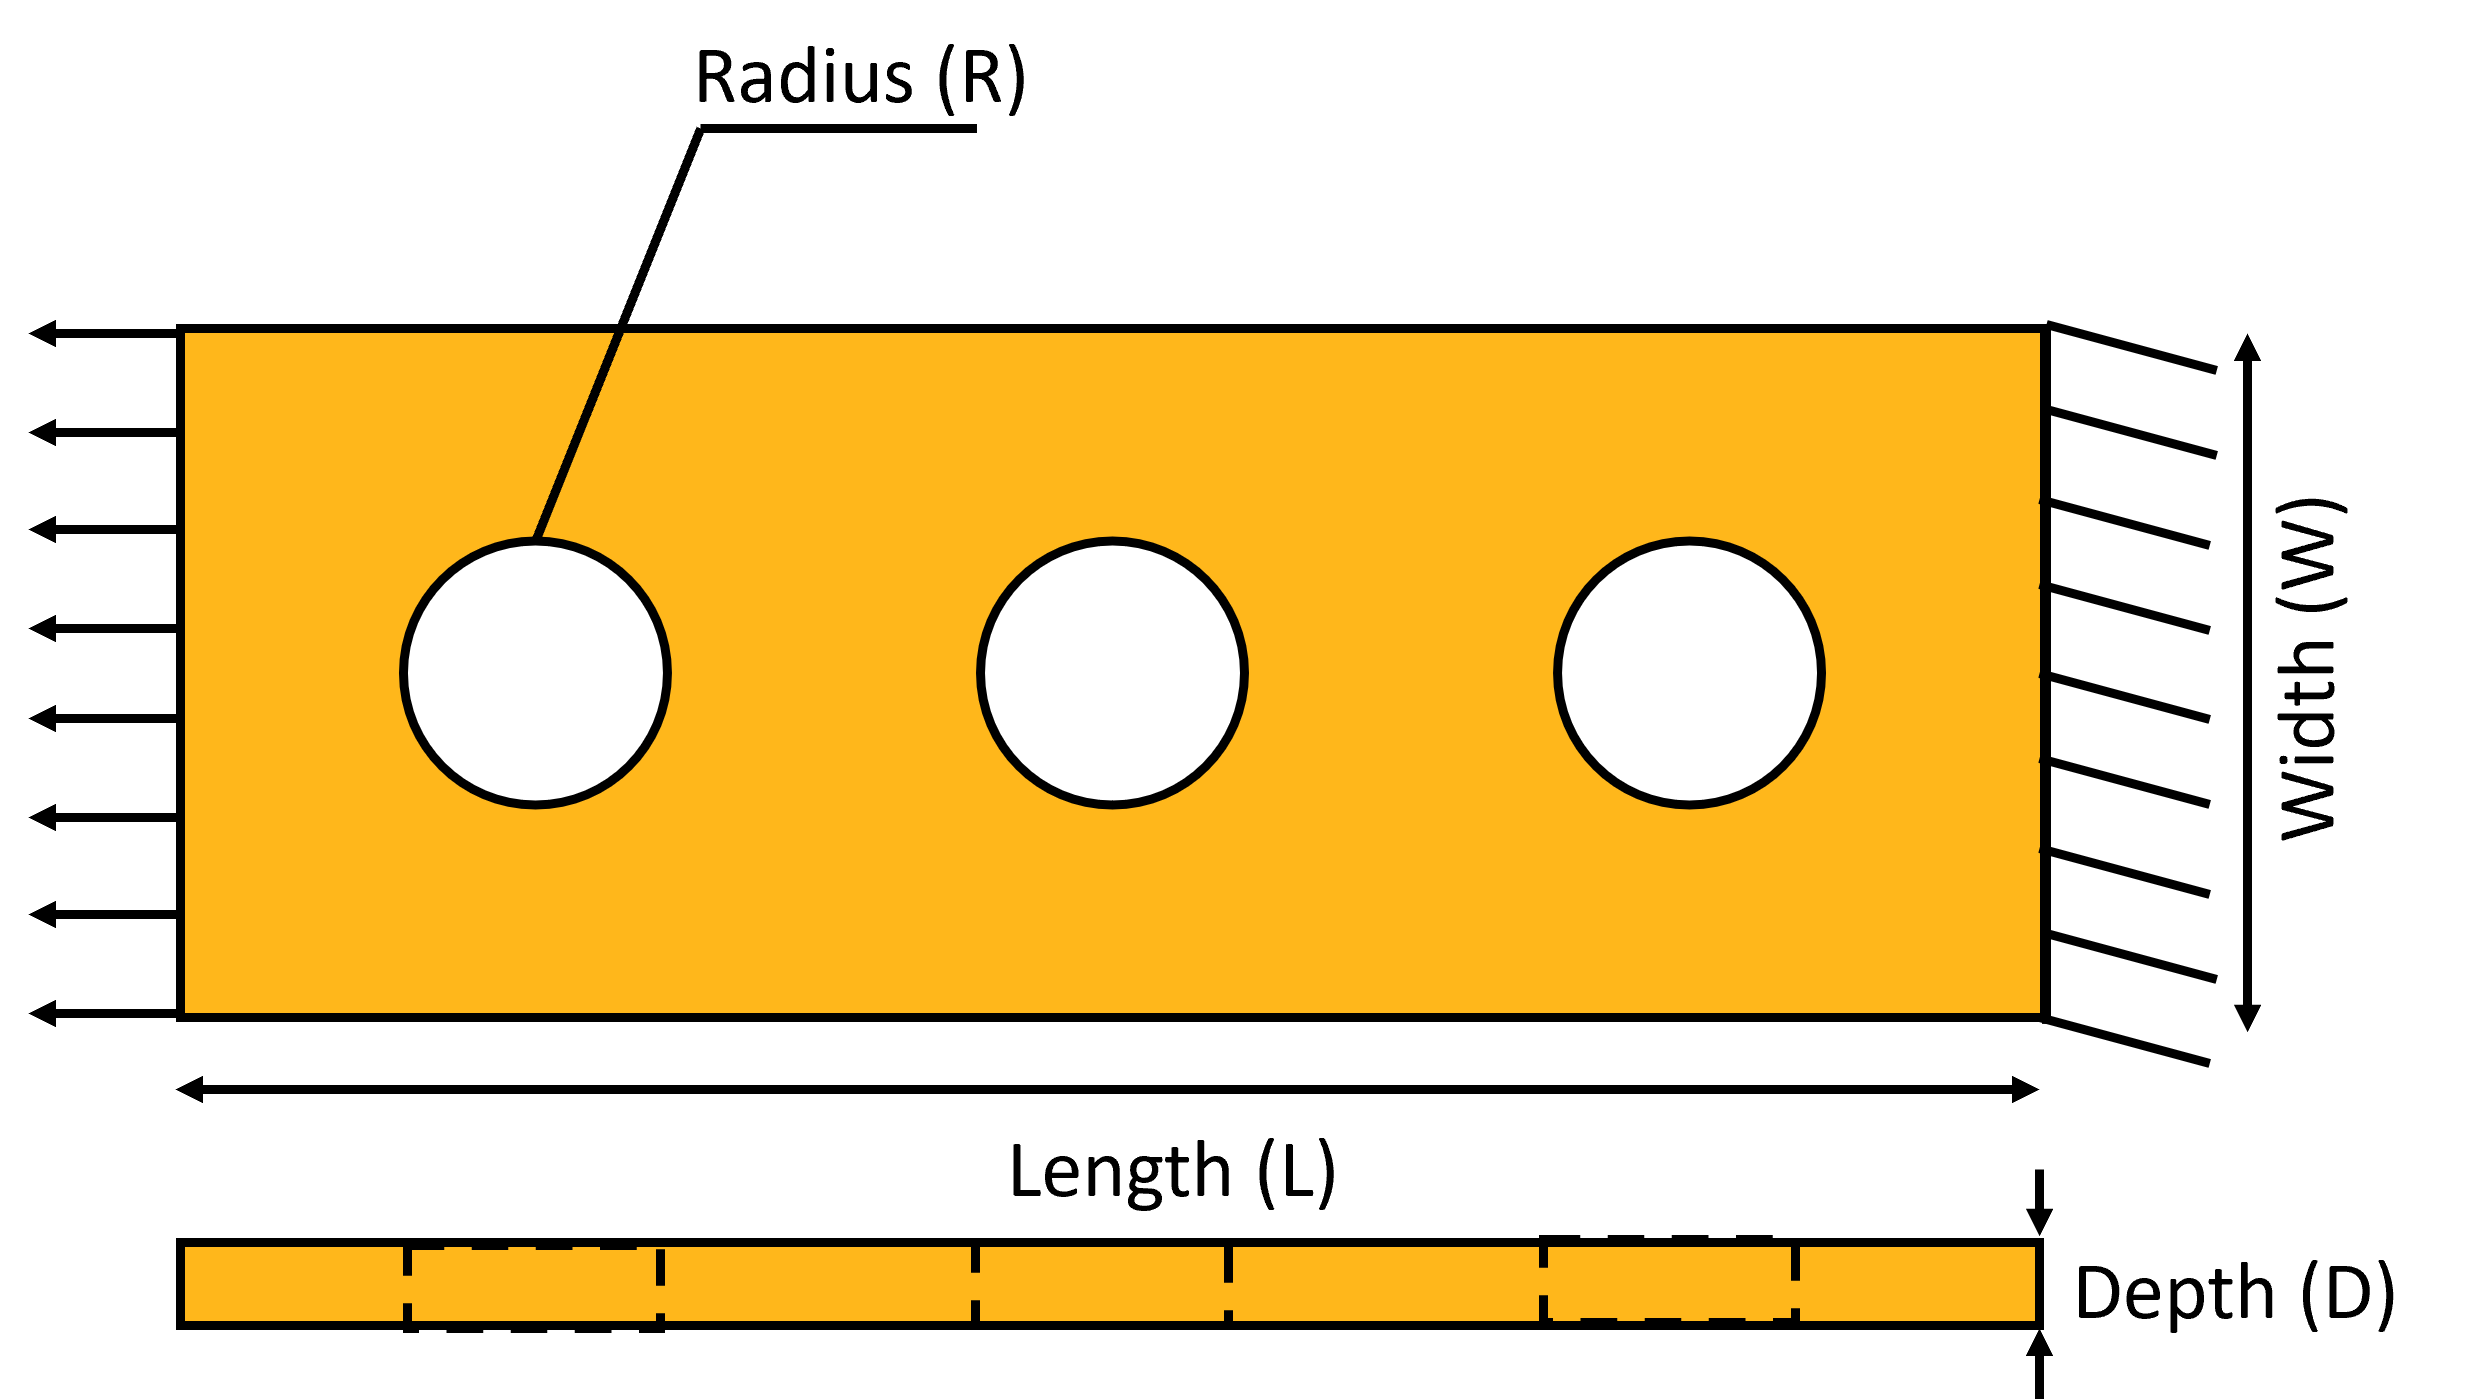

## Step 1 - define all parameters

In [29]:
# All units in (m, Kg, s)
# Plate parameters
LENGTH = 5
WIDTH = 2.5
DEPTH = 0.1

# Hole parameter
RADIUS = 0.5
NUM = 3

# Material parameter
E = 2e11
NU = 0.27

# Load parameter
PRESSURE = 1000

# Step 2 - launch MAPDL and create geometry

Make imports

In [30]:
# For core functionality
from ansys.mapdl.core import launch_mapdl

# For quite exiting on error
from commons import StopExecution

Run pyMAPDL

To stop current and subsequent cells quietly

In [31]:
try:
    mapdl = launch_mapdl(nproc=2)
    
    mapdl.clear()
    
except Exception:
    print('No MAPDL found. Terminating...')

    raise StopExecution

Enter to the preprocessor

In [32]:
mapdl.prep7()

*** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2024 R1          24.1     ***
 Ansys Mechanical Enterprise                       
 01060365  VERSION=WINDOWS x64   18:32:18  JUN 02, 2024 CP=      0.203

                                                                               



          ***** MAPDL ANALYSIS DEFINITION (PREP7) *****

Create a block volume based on working plane coordinates

In [33]:
mapdl.block(0, LENGTH, 0, WIDTH, 0, DEPTH);

Create holes as volumes and substract them from plate volume

In [34]:
for i in range(1, NUM + 1):
    # mapdl.cyl4(xcenter=i*LENGTH/(NUM+1), ycenter=WIDTH/2, rad1=RADIUS, theta1='', rad2='', theta2='', depth=2*DEPTH)
    mapdl.cyl4( i*LENGTH/(NUM+1), WIDTH/2, RADIUS, '', '', '', 2*DEPTH)
    
mapdl.vsbv(1,'all')

SUBTRACT VOLUMES

 *** WARNING ***                         CP =       0.203   TIME= 18:32:18
 Some of the requested volumes to be operated on were also included in   
 the selected set to be subtracted.  These volumes have been removed     
 from the volume to be subtracted list.                                  

      VOLUME NUMBERS TO BE OPERATED ON =       1
      VOLUMES OPERATED ON WILL BE DELETED IF POSSIBLE
      VOLUME NUMBERS TO BE SUBTRACTED  =       2      3      4
      VOLUMES SUBTRACTED WILL BE DELETED IF POSSIBLE
      OUTPUT VOLUMES =     5

Plot body

C:\Users\HP\PycharmProjects\try_pyansys\.venv\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


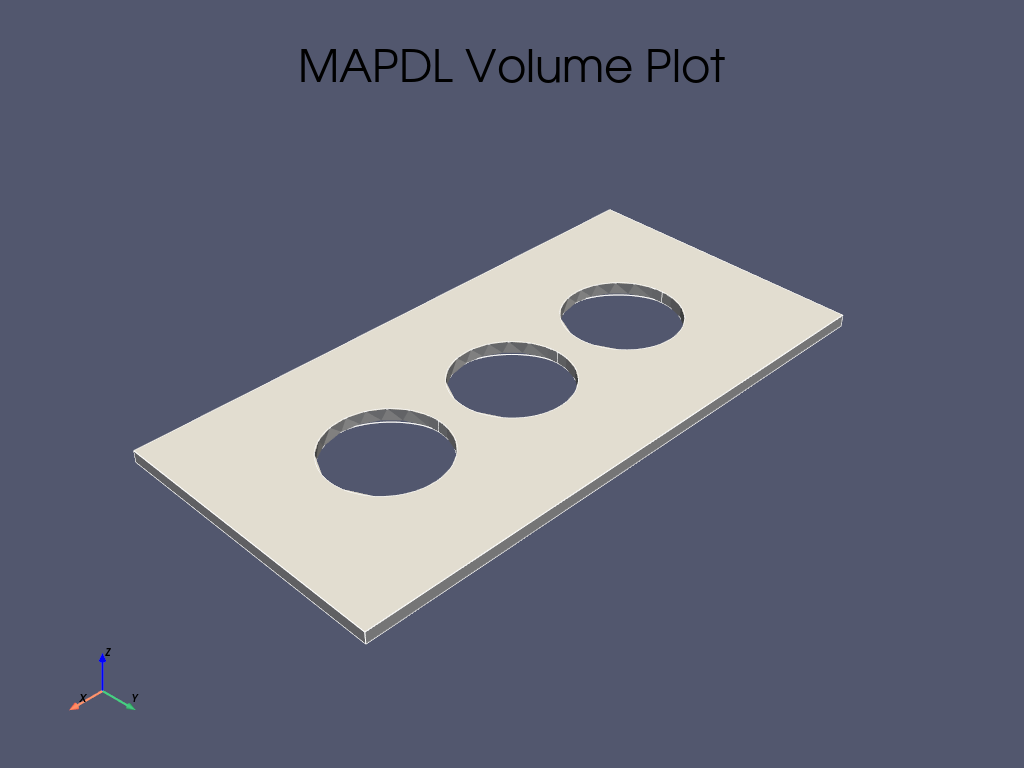

In [35]:
mapdl.vplot('all');

## Step 3 - define material properties, mesh attributes and generate mesh.

Specifies the divisions and spacing ratio on unmeshed lines

In [36]:
mapdl.lesize("ALL", 0.15, layer1=1)

SET DIVISIONS ON ALL SELECTED LINES
      FOR ELEMENT SIZE =  0.15000        SPACING RATIO =     1.0000
      (KFORCE = 0      PREVIOUS NONZERO VALUES WILL NOT BE ALTERED)
 SET LAYER-MESH CONTROLS ON ALL SELECTED LINES
      TO  LAYER1 =      1.0000   ABSOLUTE LENGTH UNITS

Defines a linear material property as a constant or a function of temperature

In [37]:
mapdl.mp('ex',1,E)
mapdl.mp('nuxy',1,NU)

MATERIAL          1     NUXY =  0.2700000

Set element type

In [38]:
mapdl.et(1,'SOLID186')

1

For elements that support multiple shapes, specifies the element shape

In [39]:
mapdl.mshape(1, "3D")

PRODUCE ALL TETRAHEDRAL ELEMENTS IN 3D.

Specifies whether free meshing or mapped meshing should be used to mesh

In [40]:
mapdl.mshkey(0)

USE THE FREE MESHER.

Generates nodes and volume elements within volumes

In [41]:
mapdl.vmesh('all')

GENERATE NODES AND ELEMENTS   IN  ALL  SELECTED VOLUMES  

 NUMBER OF VOLUMES MESHED   =         1
 MAXIMUM NODE NUMBER        =      7036
 MAXIMUM ELEMENT NUMBER     =      3278

Plots the currently selected elements

C:\Users\HP\PycharmProjects\try_pyansys\.venv\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


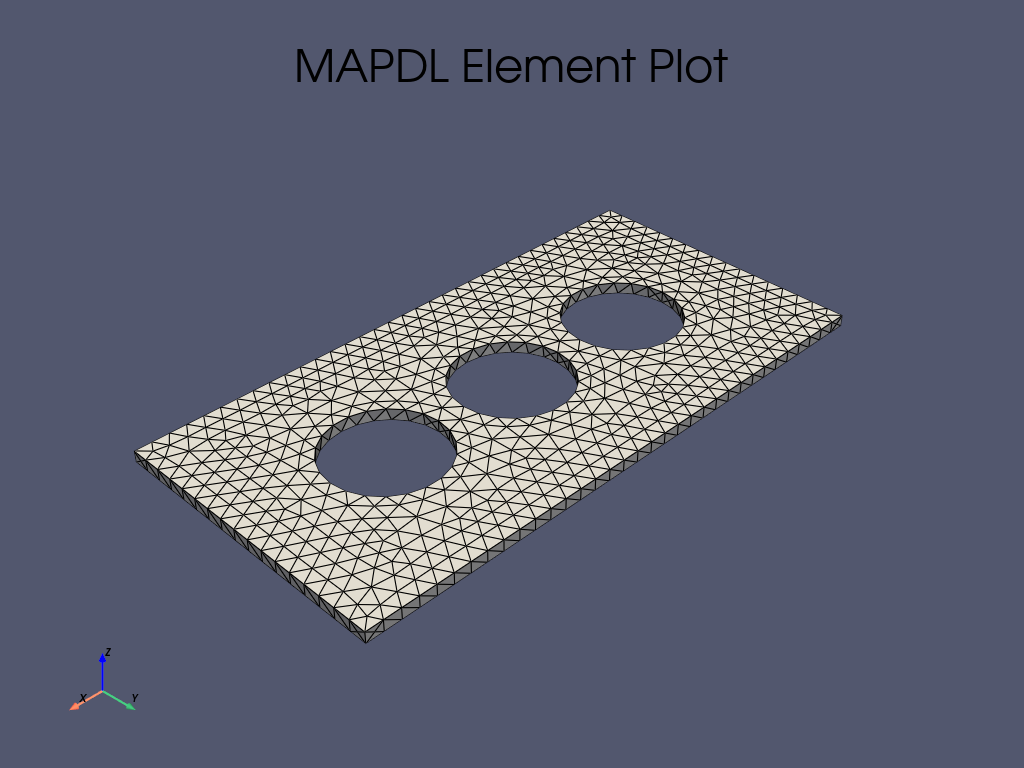

In [42]:
mapdl.eplot();

## Step 4 - apply loads and boundary conditions

Select nodes by X location

In [43]:
mapdl.nsel('s','loc','x',0)

array([ 155,  258,  326,  327,  328,  329,  330,  331,  332,  333,  334,
        335,  336,  337,  338,  339,  340,  341,  342,  343,  344,  345,
        346,  347,  348,  349,  350,  351,  352,  353,  354,  355,  356,
        357,  358, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427,
       2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438,
       2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449,
       2450, 2451, 2452, 2453, 4761, 4880, 4956, 4957, 4958, 4959, 4960,
       4961, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971,
       4972, 4973, 4974, 4975, 4976, 4977, 4978, 4979, 4980, 4981, 4982,
       4983, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993,
       4994, 4995, 4996])

Define degree-of-freedom constraints at selected nodes - all fixed

In [44]:
mapdl.d('all','all',0)

SPECIFIED CONSTRAINT UX   FOR SELECTED NODES            1 TO        7036 BY           1
 REAL=  0.00000000       IMAG=  0.00000000    
 ADDITIONAL DOFS=  UY    UZ

Select nodes by X location

In [45]:
mapdl.nsel('s','loc','x', LENGTH)

array([ 156,  224,  225,  226,  227,  228,  229,  230,  231,  232,  233,
        234,  235,  236,  237,  238,  239,  240,  241,  242,  243,  244,
        245,  246,  247,  248,  249,  250,  251,  252,  253,  254,  255,
        256,  257, 2454, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529,
       2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540,
       2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551,
       2552, 2553, 2554, 2555, 4762, 4838, 4839, 4840, 4841, 4842, 4843,
       4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854,
       4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4865,
       4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876,
       4877, 4878, 4879])

Apply pressure to selected nodes

In [46]:
mapdl.sf('all','pres',PRESSURE)

GENERATE SURFACE LOAD PRES ON SURFACE DEFINED BY ALL SELECTED NODES
 VALUES=  1000.00000      0.00000000    

 NUMBER OF PRES ELEMENT FACE LOADS STORED =         38

Reselect all entities

In [47]:
mapdl.allsel()

SELECT ALL ENTITIES OF TYPE= ALL  AND BELOW

Exit normally from a processor

In [48]:
mapdl.finish()

***** ROUTINE COMPLETED *****  CP =         0.609

## Step 4 - solve the static problem

Enter the solution processor

In [49]:
mapdl.slashsolu()

*****  MAPDL SOLUTION ROUTINE  *****

Start a solution

In [50]:
mapdl.solve()

*** NOTE ***                            CP =       0.625   TIME= 18:32:20
 The automatic domain decomposition logic has selected the MESH domain   
 decomposition method with 2 processes per solution.                     

 *****  MAPDL SOLVE    COMMAND  *****

 *** NOTE ***                            CP =       0.625   TIME= 18:32:20
 There is no title defined for this analysis.                            

 *** SELECTION OF ELEMENT TECHNOLOGIES FOR APPLICABLE ELEMENTS ***
                ---GIVE SUGGESTIONS ONLY---

 ELEMENT TYPE         1 IS SOLID186. KEYOPT(2) IS ALREADY SET AS SUGGESTED.



 *** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2024 R1          24.1     ***
 Ansys Mechanical Enterprise                       
 01060365  VERSION=WINDOWS x64   18:32:20  JUN 02, 2024 CP=      0.625

                                                                               



                       S O L U T I O N   O P T I O N S

   PROBLEM DIMENSIONALITY. . . . . . . . . . . . .3-D 

Exit normally from a processor

In [51]:
mapdl.finish()

FINISH SOLUTION PROCESSING


 ***** ROUTINE COMPLETED *****  CP =         1.250

Show solution output

In [52]:
# Enter the solver routine and solve 
mapdl.slashsolu()

# Get output
output = mapdl.solve()

# Print output
print(output)

*****  MAPDL SOLVE    COMMAND  *****

 *** NOTE ***                            CP =       1.266   TIME= 18:32:21
 There is no title defined for this analysis.                            

 *** SELECTION OF ELEMENT TECHNOLOGIES FOR APPLICABLE ELEMENTS ***
                ---GIVE SUGGESTIONS ONLY---

 ELEMENT TYPE         1 IS SOLID186. KEYOPT(2) IS ALREADY SET AS SUGGESTED.



 *** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2024 R1          24.1     ***
 Ansys Mechanical Enterprise                       
 01060365  VERSION=WINDOWS x64   18:32:21  JUN 02, 2024 CP=      1.281

                                                                               



                       S O L U T I O N   O P T I O N S

   PROBLEM DIMENSIONALITY. . . . . . . . . . . . .3-D                  
   DEGREES OF FREEDOM. . . . . . UX   UY   UZ  
   ANALYSIS TYPE . . . . . . . . . . . . . . . . .STATIC (STEADY-STATE)
   GLOBALLY ASSEMBLED MATRIX . . . . . . . . . . .SYMMETRIC  

 *** NOTE ***          

## Step 5 - plot the stress contours for the model

Get results

In [53]:
result = mapdl.result

Plot results

C:\Users\HP\PycharmProjects\try_pyansys\.venv\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


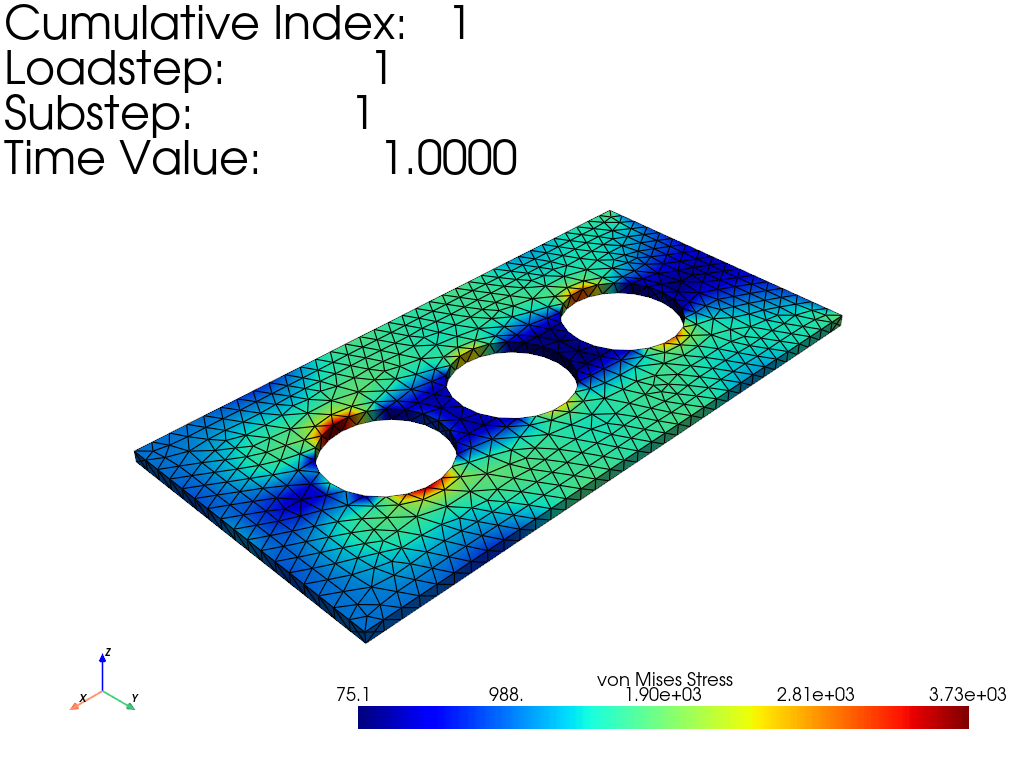

In [54]:
result.plot_principal_nodal_stress(0,'seqv',background='w',show_edges=True,text_color='k',add_text=True);

## Step 6 - exit MAPDL

In [55]:
mapdl.exit()